## Dataset 2

   Tasks:<br>
   
   Identify user trends emerging from the data provided. You may identify trends for any/ all of the metrics provided<br>
   Based on the trends identified, what would be your top 3 recommended action points for implementation for business improvement?<br>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Dataset2.csv')

In [2]:
df.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


## User Trends

### 1: Top 5 routes taken

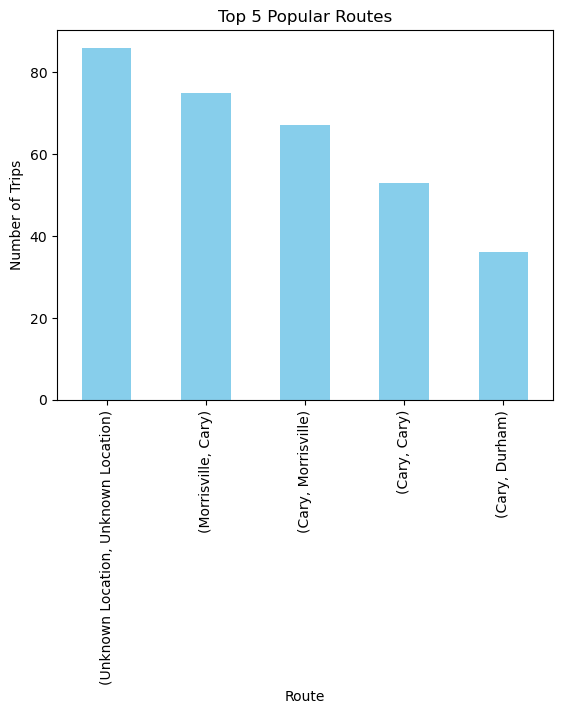

In [19]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='%m-%d-%Y %H:%M', errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format='%m-%d-%Y %H:%M', errors='coerce')

# Identify popular routes and destinations
popular_routes = df.groupby(['START', 'STOP']).size().sort_values(ascending=False).head(5)
# Plotting popular routes
popular_routes.plot(kind='bar', color='skyblue')
plt.title('Top 5 Popular Routes')
plt.xlabel('Route')
plt.ylabel('Number of Trips')
plt.show()

### 2: Top 5 trip Purposes

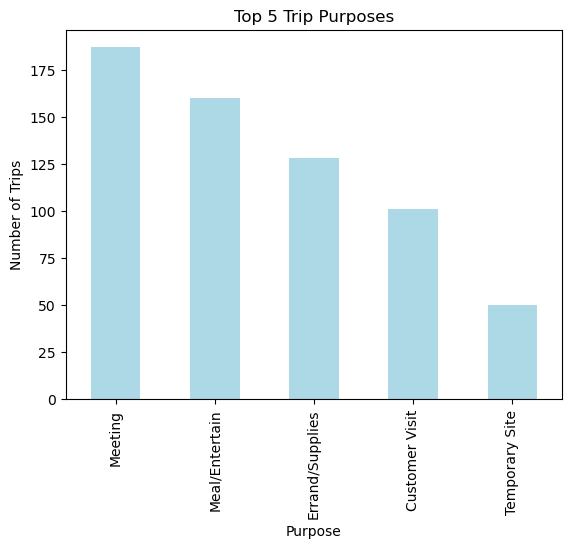

In [21]:
top_purposes = df['PURPOSE'].value_counts().head(5)

# Plotting top 5 trip purposes
top_purposes.plot(kind='bar', color='lightblue')
plt.title('Top 5 Trip Purposes')
plt.xlabel('Purpose')
plt.ylabel('Number of Trips')
plt.show()

### 3: Miles vs Trip Duration (Incl Purpose, Excl Outliers)

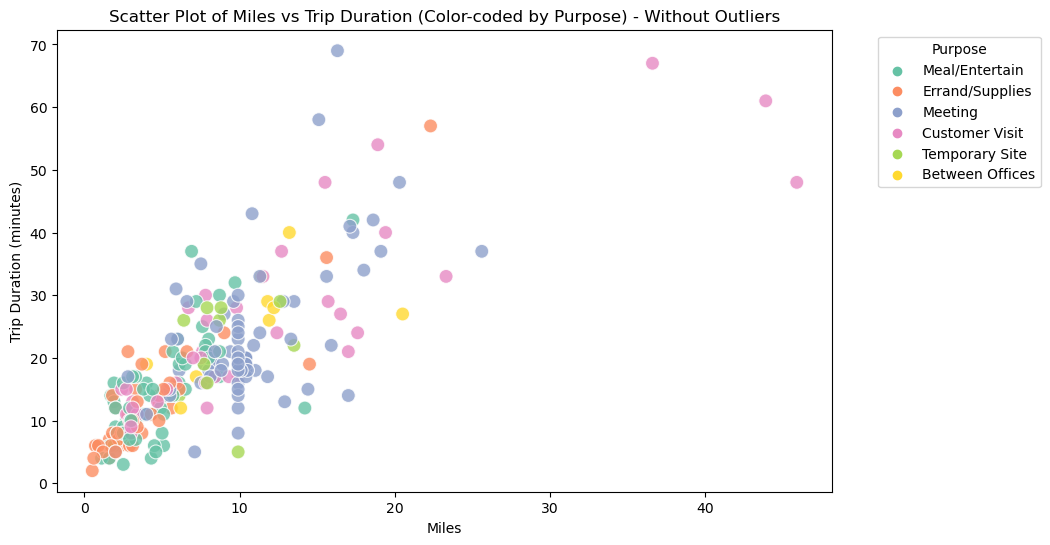

In [22]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='%m-%d-%Y %H:%M', errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format='%m-%d-%Y %H:%M', errors='coerce')
df['TRIP_DURATION'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60

# P# Set thresholds for miles and trip duration to filter outliers
mile_threshold = 50
duration_threshold = 200

# Filter the data based on thresholds
filtered_data = df[(df['MILES'] < mile_threshold) & (df['TRIP_DURATION'] < duration_threshold)]

# Plotting scatter plot of miles vs trip duration (filtered), color-coded by purpose
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MILES', y='TRIP_DURATION', hue='PURPOSE', data=filtered_data, palette='Set2', s=100, alpha=0.8)
plt.title('Scatter Plot of Miles vs Trip Duration (Color-coded by Purpose) - Without Outliers')
plt.xlabel('Miles')
plt.ylabel('Trip Duration (minutes)')
plt.legend(title='Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Based on the identified trends, here are three recommended action points for business improvement: <br>
### Route Optimization: <br>
    Action Point: Optimize service availability and marketing efforts in the top 5 routes.
    Rationale: Focusing on popular routes can enhance user experience, reduce waiting times, and increase overall efficiency. 
### Targeted Marketing and Service Enhancements by Purpose:
    Action Point: Tailor marketing strategies and service offerings based on the top 5 trip purposes.
    Rationale: Understanding user purposes allows for targeted promotions, loyalty programs, and service improvements to cater to specific user needs and preferences.

### Quality Improvement for Long-Distance Trips:<br>
    Action Point: Enhance the quality of service, amenities, and user experience for long-distance trips.
    Rationale: Long-distance trips present an opportunity for the business to provide added value, ensuring user satisfaction and potentially encouraging repeat business.